# Behaviroural Testing in NLP

Author: Kerry Chu <kerry.x.chu@gmail.com>

## Testing is important

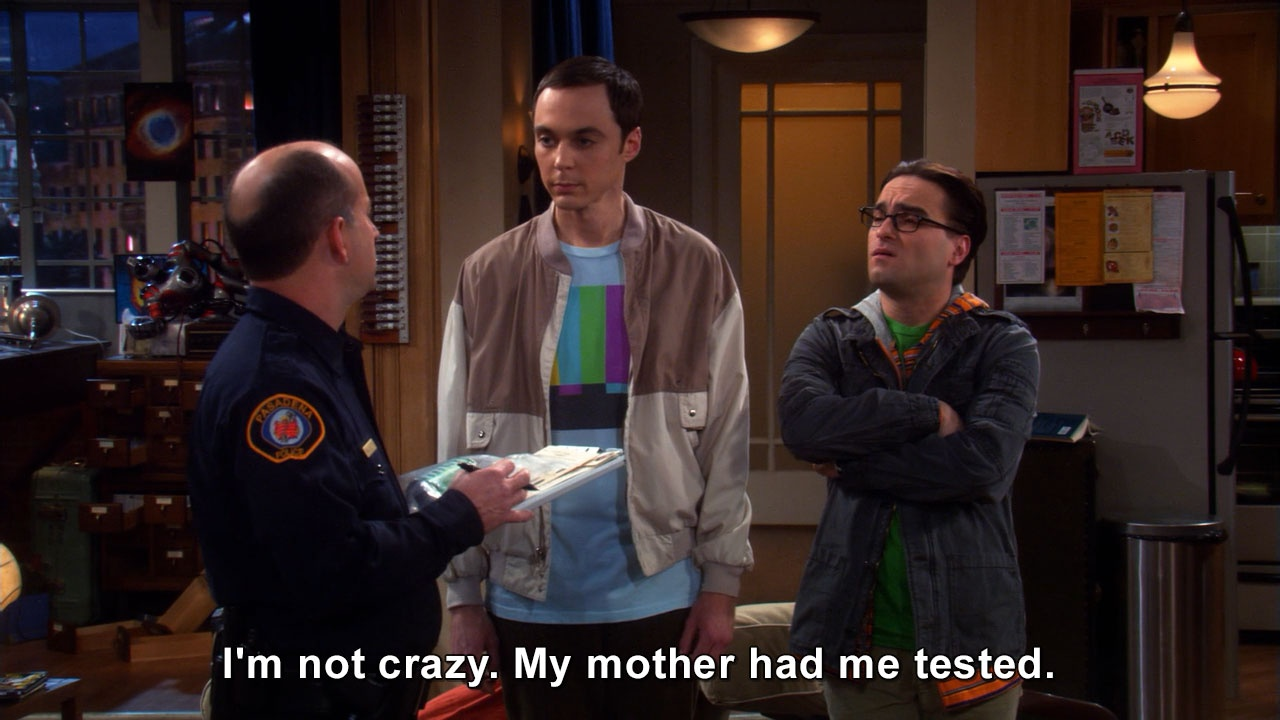

In [42]:
from IPython import display
display.Image("images/sheldon.jpeg")

## Testing in ML

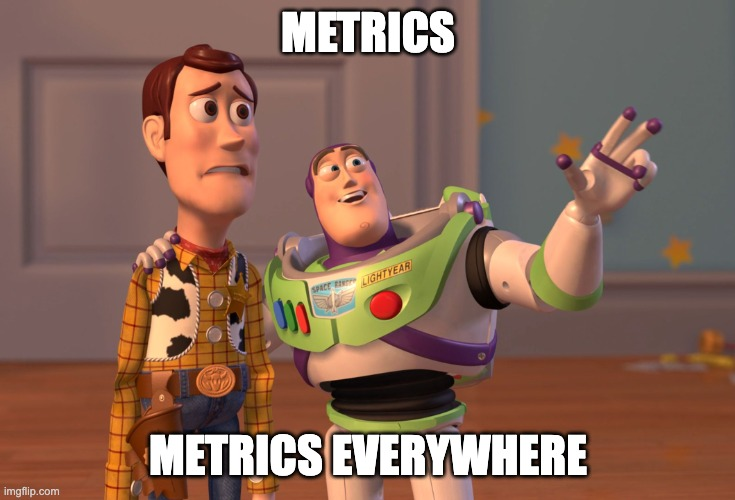

In [44]:
display.Image("images/metrics.jpeg")

## Behavioural Testing in NLP model

Ribeiro, Marco Tulio, Tongshuang Wu, Carlos Guestrin, and Sameer Singh. **"Beyond accuracy: Behavioral testing of NLP models with CheckList"** arXiv preprint arXiv:2005.04118 (2020)

[checklist github repo](https://github.com/marcotcr/checklisthttps://github.com/marcotcr/checklist)

In [53]:
# let's setup first
!pip install checklist
!jupyter nbextension install --py --sys-prefix checklist.viewer
!jupyter nbextension enable --py --sys-prefix checklist.viewer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 KB 1.3 MB/s eta 0:00:004.2 MB/s eta 0:00:01
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached ipywidgets-7.6.5-py2.py3-none-any.whl (121 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 KB 1.6 MB/s eta 0:00:000:00:010:00:01
  Preparing metadata (setup.

In [54]:
!pip install torch
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 MB 2.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Example-based Testing

The output of the system is very explicit.

### Unit Testing

- Unit testing is a well-known type of example-based testing.
- A unit test is a way of testing a unit - the smallest piece of code that can be logically isolated in a system. 

In [45]:
import ipytest
import pytest
ipytest.autoconfig()

In [30]:
def sum_two_integer(x: int, y: int) -> int:
    return x + y

In [33]:
%%ipytest 

def test_sum():
    assert sum_two_integer(2, 5) == 7

.                                                                                            [100%]
========================================= warnings summary =========================================
.dev/lib/python3.9/site-packages/_pytest/config/__init__.py:1126
  /Users/kerrychu/Code/behavioural_testing_in_nlp/.dev/lib/python3.9/site-packages/_pytest/config/__init__.py:1126: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: hypothesis
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 1 warning in 0.00s


## Metamorphic Testing
What if you don't know what's the exact output of your system?

The idea was first proposed in 1998 by T.Y.Chen and was only being picked up in recent years.

- Metamorphic testing is a testing approach which uses metamorphic relations, properties of the software under test represented in the form of relations among inputs and outputs of multiple executions, to help verify the correctness of a program.
- Metamorphic testing is an approach to both test case generation and test result verification. A central element is a set of metamorphic relations, which are necessary properties of the target function or algorithm in relation to multiple inputs and their expected outputs.

In [46]:
from typing import List
import math
import hypothesis.strategies as st
from hypothesis import given

### Property-based

In [27]:
%%ipytest 

# hypothesis/property: if the list is sorted in ascending order, then the elements in the lower index should always be smaller value than those of higher index
@given(st.lists(st.integers(min_value=-10000, max_value=10000)))
def test_sort(list_):
  sorte_list = list(sorted(list_))
  assert set(sorte_list) == set(list_)
  assert all(a <= b for a, b in zip(sorte_list, sorte_list[1:]))

.                                                                                            [100%]
========================================= warnings summary =========================================
.dev/lib/python3.9/site-packages/_pytest/config/__init__.py:1126
  /Users/kerrychu/Code/behavioural_testing_in_nlp/.dev/lib/python3.9/site-packages/_pytest/config/__init__.py:1126: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: hypothesis
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 1 warning in 0.07s


In [50]:
def encode(input_string: str) -> List[str]:
    
# please pretend that you did not see these two lines
    if not input_string:
        return []

    count = 1
    prev = ""
    lst = []
    
    for character in input_string:
        if character != prev:
            if prev:
                entry = (prev, count)
                lst.append(entry)
            count = 1
            prev = character
        else:
            count += 1
    entry = (character, count)
    lst.append(entry)
    return lst


def decode(lst: List[str]) -> str:
    q = ""
    for character, count in lst:
        q += character * count
    return q

In [51]:
%%ipytest

# hypothesis/relationship: if we encode the string and decode it, it should return the same string we input for encode
@given(st.text(min_size=0, max_size=1000))
def test_decode_inverts_encode(s):
    assert decode(encode(s)) == s

.                                                                                            [100%]
========================================= warnings summary =========================================
.dev/lib/python3.9/site-packages/_pytest/config/__init__.py:1126
  /Users/kerrychu/Code/behavioural_testing_in_nlp/.dev/lib/python3.9/site-packages/_pytest/config/__init__.py:1126: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: hypothesis
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 1 warning in 0.07s


#### Some property based testing libraries for different programming languages:
- [Haskell: QuickCheck](https://hackage.haskell.org/package/QuickCheck)
- [Python: Hypothesis](https://hypothesis.readthedocs.io/en/latest/index.html)
- [Scala: ScalaCheck](https://scalacheck.org/)
- [JavaScript: fast-check](https://github.com/dubzzz/fast-check)

## Minimum Functionality test (MFT)

## Invariance test (INV) 

## Directional Expectation test (DIR)